## Linked List

### Singly linked list

#### Overview
* Each node in a singly-linked list contains not only the value but also a reference field to link to the next node. By this way, the singly-linked list organizes all the nodes in a sequence.
* In most cases, we use the head node (the first node) to represent the whole list
* Access a random element
    + we are not able to access a random element in a singly-linked list in constant time.
    + If we want to get the ith element, we have to traverse from the head node one by one. 
    + It takes us O(N) time on average to visit an element by index, where N is the length of the linked list.
    
* Add operation
  + we can add a new node to a linked list if we know the node (prev) after which we want to insert
  + to add a new node at the begining, assign the curr.next to head, and then assign head to curr

* Delete operation
  + find the node before the node to delete (prev)
  + link prev.next to prev.next.next
  + to search and find the node to delete and its previous node, we need to traverse the linked list, which takes O(N)
  + to delete the first node from the list is simple: we just assign head to head.next

#### Leetcode 707. Design Linked List
* Overview
  + Design your implementation of the linked list. You can choose to use a singly or doubly linked list.
  + A node in a singly linked list should have two attributes: val and next. val is the value of the current node, and next is a pointer/reference to the next node.
  + If you want to use the doubly linked list, you will need one more attribute prev to indicate the previous node in the linked list. Assume all nodes in the linked list are 0-indexed.

  + Implement the MyLinkedList class:

    + MyLinkedList() Initializes the MyLinkedList object.
    + int get(int index) Get the value of the index-th node in the linked list. If the index is invalid, return -1.
    + void addAtHead(int val) Add a node of value val before the first element of the linked list. After the insertion, the new node will be the first node of the linked list.
    + void addAtTail(int val) Append a node of value val as the last element of the linked list.
    + void addAtIndex(int index, int val) Add a node of value val before the indexth node in the linked list. If index equals the length of the linked list, the node will be appended to the end of the linked list. If index is greater than the length, the node will not be inserted.
    + void deleteAtIndex(int index) Delete the indexth node in the linked list, if the index is valid.
    
* Algorithm
  + a typical linked list implementation
  + use two helper functions
    + `getNode(self, index: int) -> Optional[Node]` which returns the node at the given index
    + `getTail(self)-> Optional[Node]` returns the tail node
  + get(self, index:int) -> int 
    + first, use getNode(index) to get the node, then return node.val if node else -1
  + addAtHead(self, val: int) -> None
    + we don't care if the curent head is None
    + node.next = self.head, and self.head = node 
  + addTail(self, val:int) -> None
    + first getTail, if tail is None, we have an empty list, call addAtHead(val)
    + if tail exists, set tail.next= node
  + addAtIndex(self, index:int, val:int) -> None
    + if index == 0, call addAtHead(val)
    + otherwise, get pre node by getNode(index-1)
      + if pre is None, return
      + otherwise, set node.next = pre.next and pre.next = node
  + deleteAtIndex(self, index:int) -> None
    + if index==0
      + if self.head is None, return, nothing to delete
      + otherwise, self.head = self.head.next
    + get pre node using getNode(index-1)
      + if pre or pre.next is None, nothing to delete, return
      + otherwise, pre.next=pre.next.next

In [2]:
from typing import Optional, List
class Node:
    def __init__(self, val: int = 0):
        self.val = val
        self.next = None
        
class MyLinkedList:

    def __init__(self):
        self.head = None
                
    # help function to return the node at given index 
    # if no node exists at index, return None
    # otherwise, return the node object
    def getNode(self, index:int) -> Optional[Node]:
        curr = self.head
        while curr and (index > 0):
            curr = curr.next
            index -= 1
        return curr    
    
    # help function to return the tail node where its next is None
    # if the list is empty (no head), return None
    def getTail(self) -> Optional[Node]:
        if not self.head:
            return None
        
        curr = self.head
        while curr.next:
            curr = curr.next
        return curr
    
    # use getNode to find the node object
    # if the node is None, return -1, else returns its value
    def get(self, index: int) -> int:
        node = self.getNode(index)
        return node.val if node else -1
        

    # set the node.next = self.head, and 
    # set self.head = node
    def addAtHead(self, val: int) -> None:
        node = Node(val)
        node.next = self.head
        self.head = node        

    # get the tail node, if tail is None, we have an empty list
    # then use addAtHead, otherwise, set the tail.next = node
    def addAtTail(self, val: int) -> None:
        
        tail = self.getTail()
        if not tail:
            self.addAtHead(val)
            return
        node = Node(val)
        tail.next = node
        

    # first check if index==0, then call addAtHead, otherwise
    # get the pre node at index-1, if pre is None, return
    # otherwise, set node.next=pre.next and pre.next=node
    def addAtIndex(self, index: int, val: int) -> None:
        if index == 0:
            self.addAtHead(val)
            return
        pre = self.getNode(index-1)
        if not pre:
            return
        node = Node(val)
        node.next = pre.next
        pre.next = node        

    # first check if index==0, if so if self.head is None, return
    # otherwise, set self.head = self.head.next
    # if index > 0, get pre node at index-1, if pre or pre.next is None, return
    # otherwise, pre.next = pre.next.next
    def deleteAtIndex(self, index: int) -> None:
        if index == 0:
            if not self.head:
                return
            self.head = self.head.next
        else:
            pre = self.getNode(index-1)
            if not pre or not pre.next:
                return
            pre.next = pre.next.next
        


# Your MyLinkedList object will be instantiated and called as such:
# obj = MyLinkedList()
# param_1 = obj.get(index)
# obj.addAtHead(val)
# obj.addAtTail(val)
# obj.addAtIndex(index,val)
# obj.deleteAtIndex(index)

### Two-pointer in Linked List
* to detect a cyclic linked list, we can use
  + hashmap to mark each node and traverse the list. If the same node is visited, return True
    + we don't care how the hash code is implemented, the same node object should have the same hash code
  + use fast and slow pointers to check if they point to the same node object  
  + for both methods, pointers will go to None without checking conditions return True

#### 141. Linked List Cycle
* Overview
  + Given head, the head of a linked list, determine if the linked list has a cycle in it.
  + There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.
  + Return true if there is a cycle in the linked list. Otherwise, return false.
* Algorithm
  + handle the edge cases of head is None or head.next is None
  + initialize fast = head.next.next and slow = head.next
  + in while fast and fast.next loop, 
    + move fast = fast.next.next, and slow = slow.next 
    + then check if fast == slow, if so, return True
  + if the code jumps out of the while loop, return False  

#### Leetcode 142. Linked List Cycle II
* Overview
  + Given the head of a linked list, return the node where the cycle begins. If there is no cycle, return null.
  + There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to (0-indexed). It is -1 if there is no cycle. Note that pos is not passed as a parameter.
  + Do not modify the linked list.
* Algorithm
  + use fast and slow pointers
  + time complexity 
    + O(N)
  + space complexity
    + O(1)

In [4]:
# Definition for singly-linked list.
from typing import List, Optional

class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None or head.next is None:
            return None
        
        fast = head.next.next
        slow = head.next
        
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next
            
            # if the list is cyclic, first make fast and slow overlap
            # then reset fast at head, and then move fast and slow 
            # at the same pace until they met at the entry point of the cycle
            if fast == slow:
                fast = head
                while fast != slow:
                    fast =fast.next
                    slow = slow.next
                return slow    
        
        # if fast or fast.next jumps out of the loop, the list is acyclic
        return None
        

#### 160. Intersection of Two Linked Lists
* Overview
  + Given the heads of two singly linked-lists headA and headB, return the node at which the two lists intersect. If the two linked lists have no intersection at all, return null.
  + For example, the following two linked lists begin to intersect at node c1:
  + Note that the linked lists must retain their original structure after the function returns.
  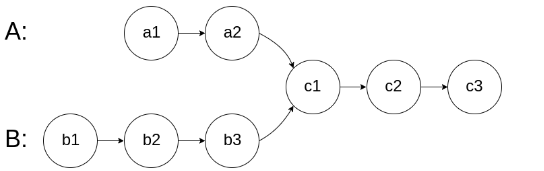
* Algorithm
  + if headA or headB is None, return None
  + set countA = countB = 0
  + set tmpA = headA and tmpB = headB, and move them synchronously if tmpA and tmpB
  + out of the while loop
    + if tmpA, continue to traverse listA, and start to increament count A
    + if tmpB, continue to traverse listB, and start to increament count B
  + one of countA and countB will be > 0, this is the extra number of nodes in the longer list
    + reset tmpA and tmpB to headA and headB, respectively
    + for \_ in countA, tmpA = tmpA.next
    + for \_ in countB, tmpB = tmpB.next
  + while tmpA and tmpB, if tmpA == tmpB, return tmpA
  + out of while loop, return None

In [5]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> Optional[ListNode]:
        if headA is None or headB is None:
            return None
        
        tmpA, tmpB = headA, headB
        countA, countB = 0, 0
        
        while tmpA and tmpB:
            tmpA = tmpA.next
            tmpB = tmpB.next
            
        while tmpA:
            tmpA = tmpA.next
            countA += 1
            
        while tmpB:
            tmpB = tmpB.next
            countB += 1
            
        tmpA, tmpB = headA, headB
        
        for _ in range(countA):
            tmpA = tmpA.next
            
        for _ in range(countB):
            tmpB = tmpB.next
        
        while tmpA and tmpB:
            if tmpA == tmpB:
                return tmpA
            tmpA = tmpA.next
            tmpB = tmpB.next
        return None     
        

#### Leetcode 19. Remove Nth Node From End of List
* Overview
  + Given the head of a linked list, remove the nth node from the end of the list and return its head.
* Algorithm
  + the key point is to locate the previous node of the target node to delete the target node
  + first, set p1 = head, and move n steps, if p1 is None and n == 0, that means we need to delete the head node (e.g. we only have one node and n == 1)
  + then set p2 = head, and move p1 and p1 at the same pace until p1.next is None
    + now, p1 points to the tail of the list (the last not None node), and p2 points to the prev node of the target node
    + remove the target node by setting prev.next = prev.next.next
* Time complexity
  + O(N) one pass to traverse the list
* Space complexity
  + O(1)

In [ ]:
# Definition for singly-linked list.

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        if not head:
            return None
        
        p1 = head
        p2  = head
        
        # p1 goes for n steps ahead of p2
        while p1 and n > 0:
            p1 = p1.next
            n -= 1
        
        # if p1 is None and n==0
        # the head node needs to be removed
        if p1 is None and n == 0:
            return head.next
        
        # move p1 and p2 at the same pace
        # p2 will be the prev point of the 
        # node that needs to be removed
        while p1.next:
            p1 = p1.next
            p2 = p2.next
            
        # remove the target node
        p2.next = p2.next.next
        
        return head   
            

#### Leetcode 206. Reverse Linked List
* Overview
  + Given the head of a singly linked list, reverse the list, and return the reversed list.
* Algorithm
  + iteration
    + use iteration template
      + if head is None or head.next is None, return head
      + initialize pre = next_node = None, curr = head
      + while curr, next_node = curr.next, curr.next = pre, pre = curr, curr = next_node
      + return pre out of the while loop
    + time complexity
      + O(N)
    + space complexity
      + O(1)
  + recursive
    + the trick here is to return the last node in the recursive call
    + we can't return the current node in recursive call, since we need to get the last node to be returned as the new head
    + instead of linking the return node'next node to the current node, we use node.next.next = node to define the next node's next to the current node. This allows us to pass and return the last node to the function 

In [1]:
# recursive implementation
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

from typing import List, Optional
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None or head.next is None:
            return head
        
        def reverse(node: Optional[ListNode]) -> Optional[ListNode]:
            if node.next is None:
                return node
            
            pre = reverse(node.next)
            
            # instead of defining pre.next = node,
            # we use node.next.next = node, this allows us
            # to return pre all the way back, instead of having to
            # return node to connect the reverse list
            node.next.next = node
            
            # set node.next to None to avoid cyclic list
            node.next = None            
            return pre
        
        return reverse(head)
    
# iterative implementation
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None or head.next is None:
            return head
        
        pre = None        
        
        while head:
            next_node = head.next
            head.next = pre
            pre = head
            head = next_node
            
        return pre         
        

#### Leetcode 203. Remove Linked List Elements
* Given the head of a linked list and an integer val, remove all the nodes of the linked list that has Node.val == val, and return the new head.
* Algorithm
  + since the head node's val might equals to val, it is possible to be removed, so we use dummy node
  + we are ensured if node is not None and node.val != val, that node will be valid, so we just use a simple while loop to remove all the nodes with vals == val, and out of the while loop, provided the node is not None, we will keep the node
  + we use the outer while loop to check curr is not None
  + we use the inner while loop to remove nodes with node.val == val
* time complexity
  + O(N)
* space complexity
  + O(1)

In [2]:
# Definition for singly-linked list.
from typing import Optional, List
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:
        if head is None:
            return head
        
        dummy = ListNode()
        dummy.next = head
        
        curr = dummy
        while curr:
            while curr.next and curr.next.val == val:
                curr.next = curr.next.next
            # now curr.next will be kept if it is not None
            curr = curr.next
        return dummy.next        
        

#### Leetcode 328. Odd Even Linked List
* Overview
  + Given the head of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return the reordered list.
  + The first node is considered odd, and the second node is even, and so on.
  + Note that the relative order inside both the even and odd groups should remain as it was in the input.
  + You must solve the problem in O(1) extra space complexity and O(n) time complexity.
* Algorithm
  + the key point is to start constructing the list from even, since even is the second half of the reconstructed list, and would have the cyclic list problem
  + an intuitive way to think is that we check even and even.next in while loop. This enusres the end of the loop will have None
  + the last odd node we explicitly connect its next to the even_head, but the last even node is not explicitly taken care of. 
  + if we put even and even.next in while loop, we are guaranteed to take care of the last even node's next 

In [3]:
from typing import List, Optional

# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def oddEvenList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None or head.next is None:
            return head
        
        odd = head
        even_head = even = head.next
        
        while even and even.next:
            odd.next = even.next
            odd = odd.next
            even.next = odd.next
            even = even.next
            
       
        odd.next = even_head
        return head
            

#### Leetcode 234. Palindrome Linked List
* Overview
  + Given the head of a singly linked list, return true if it is a palindrome or false otherwise.
* Algorithm
  + separatet the list to two half part using two pointers. The slow point will stop at the middle of the list (if the list length is n, slow pointer will point to n//2 index node)
    + if list contains odd number of nodes, the sceond part starting from the slow pointer will have one more node than the first part
  + reverse the second part of the list
  + while head and slow, compare the two parts one by one, if any of the comparison fails, return False
  + return True if the while loop completes
* Time complexity
  + O(n)
* Space complexity
  + O(1)

In [5]:
from typing import Optional, List
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def isPalindrome(self, head: Optional[ListNode]) -> bool:
        if head is None or head.next is None:
            return True
        
        def reverse(node: Optional[ListNode]) -> Optional[ListNode]:
            if node is None or node.next is None:
                return node
            
            pre, next = None, None
            while node:
                next = node.next
                node.next = pre
                pre = node
                node = next
            return pre    
        
        fast = head
        slow = head
        
        
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next
            
        fast = head
        slow = reverse(slow)       
            
        while slow and fast:
            if slow.val != fast.val:
                return False
            slow = slow.next
            fast = fast.next
        return True           

### Doubly Linked List
* in addition to have val and next, it also has pre attribute to link to its previous neighbor
* the common operation of adding a node is to first connect the curr node by setting it pre and next, and then set its previous and next nodes' next and pre attributes O(1)
  + how to add a node to the beginning and end of the list?
* deletion: since we can access the previous node, we can directly delete a node in O(1)
  + how to delete a node from the beginning and end of the list?
* we can implement a doubly linked list based on singly linked list
  + be careful to set the pre and next pointers
    + check if the node exists when setting its pre and next 

In [ ]:
class Node:
    def __init__(self, val: int = 0):
        self.val = val
        self.next = None
        self.pre = None
        
class MyLinkedList:

    def __init__(self):
        self.head = None
                
    # help function to return the node at given index 
    # if no node exists at index, return None
    # otherwise, return the node object
    def getNode(self, index:int) -> Optional[Node]:
        curr = self.head
        while curr and (index > 0):
            curr = curr.next
            index -= 1
        return curr    
    
    # help function to return the tail node where its next is None
    # if the list is empty (no head), return None
    def getTail(self) -> Optional[Node]:
        if not self.head:
            return None
        
        curr = self.head
        while curr.next:
            curr = curr.next
        return curr
    
    # use getNode to find the node object
    # if the node is None, return -1, else returns its value
    def get(self, index: int) -> int:
        node = self.getNode(index)
        return node.val if node else -1
        

    # set the node.next = self.head, and 
    # set self.head = node
    def addAtHead(self, val: int) -> None:
        node = Node(val)
        node.next = self.head
        if node.next:
            node.next.pre = node
        self.head = node        

    # get the tail node, if tail is None, we have an empty list
    # then use addAtHead, otherwise, set the tail.next = node
    def addAtTail(self, val: int) -> None:
        
        tail = self.getTail()
        if not tail:
            self.addAtHead(val)
            return
        node = Node(val)
        tail.next = node
        node.pre = tail
        

    # first check if index==0, then call addAtHead, otherwise
    # get the pre node at index-1, if pre is None, return
    # otherwise, set node.next=pre.next and pre.next=node
    def addAtIndex(self, index: int, val: int) -> None:
        if index == 0:
            self.addAtHead(val)
            return
        pre = self.getNode(index-1)
        if not pre:
            return
        node = Node(val)
        node.next = pre.next
        node.pre = pre
        pre.next = node 
        if node.next:
            node.next.pre = node

    # first check if index==0, if so if self.head is None, return
    # otherwise, set self.head = self.head.next
    # if index > 0, get pre node at index-1, if pre or pre.next is None, return
    # otherwise, pre.next = pre.next.next
    def deleteAtIndex(self, index: int) -> None:
        if index == 0:
            if not self.head:
                return
            self.head = self.head.next
            if self.head:
                self.head.pre = None
        else:
            curr = self.getNode(index)
            if not curr:
                return
            curr.pre.next = curr.next
            if curr.next:
                curr.next.pre = curr.pre
            curr.next = None
            curr.pre = None
        


# Your MyLinkedList object will be instantiated and called as such:
# obj = MyLinkedList()
# param_1 = obj.get(index)
# obj.addAtHead(val)
# obj.addAtTail(val)
# obj.addAtIndex(index,val)
# obj.deleteAtIndex(index)

### Conclusion

#### Leetcode  21. Merge Two Sorted Lists
* Overview
  + You are given the heads of two sorted linked lists list1 and list2.
  + Merge the two lists in a one sorted list. The list should be made by splicing together the nodes of the first two lists.
  + Return the head of the merged linked list.
* Algorithm
  + define a dummy node and a curr node pointing to dummy node
  + while l1 and l2
    + compare l1.val and l2.val, if l1.val <= l2.val, curr.next = l1, otherwise, curr.next = l2
    + set curr = curr.next, and curr.next = None
  + if l1, curr.next = l1
  + if l2, curr.next = l2
  + return dummy.next
   

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
        if not list1 and not list2:
            return None
        if not list1:
            return list2
        if not list2:
            return list1
        
        dummy = ListNode()
        curr = dummy
        
        while list1 and list2:
            if list1.val <= list2.val:
                curr.next = list1
                list1 = list1.next
                
            else:
                curr.next = list2
                list2 = list2.next
            curr = curr.next
            curr.next = None
            
        if list1:
            curr.next = list1
        if list2:
            curr.next = list2
        return dummy.next         

#### Leetcode 2. Add Two Numbers
* Overview
  + You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.
  + You may assume the two numbers do not contain any leading zero, except the number 0 itself.
* Algorithm
  + initialize total = 0, a dummy and curr nodes. 
  + Traverse the lists by while l1 or l2
    + if l1, add l1.val to total
    + if l2, add l2.val to total
    + create a ListNode with val = total % 10, and reassign total //= 10
    + link curr.next to the new node, and set curr = curr.next
  + if total > 0, create a node with val = total, and connect it to curr.next
  + return dummy.next

In [6]:
from typing import Optional, List

# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        if not l1 and not l2:
            return None
        if not l1:
            return l2
        if not l2:
            return l1
        
        dummy = curr = ListNode()
        total = 0
        
        while l1 or l2:
            if l1:
                total += l1.val
                l1 = l1.next
            if l2:
                total += l2.val
                l2 = l2.next
            node = ListNode(total % 10)  
            total //= 10
            curr.next = node
            curr = curr.next
            
        if total > 0:
            curr.next = ListNode(total)
        return dummy.next    
    
            

#### Leetcode 430 Flatten a Multilevel Doubly Linked List
* Overview
  + You are given a doubly linked list, which contains nodes that have a next pointer, a previous pointer, and an additional child pointer. This child pointer may or may not point to a separate doubly linked list, also containing these special nodes. These child lists may have one or more children of their own, and so on, to produce a multilevel data structure as shown in the example below.
  + Given the head of the first level of the list, flatten the list so that all the nodes appear in a single-level, doubly linked list. Let curr be a node with a child list. The nodes in the child list should appear after curr and before curr.next in the flattened list.
  + Return the head of the flattened list. The nodes in the list must have all of their child pointers set to null.
  + 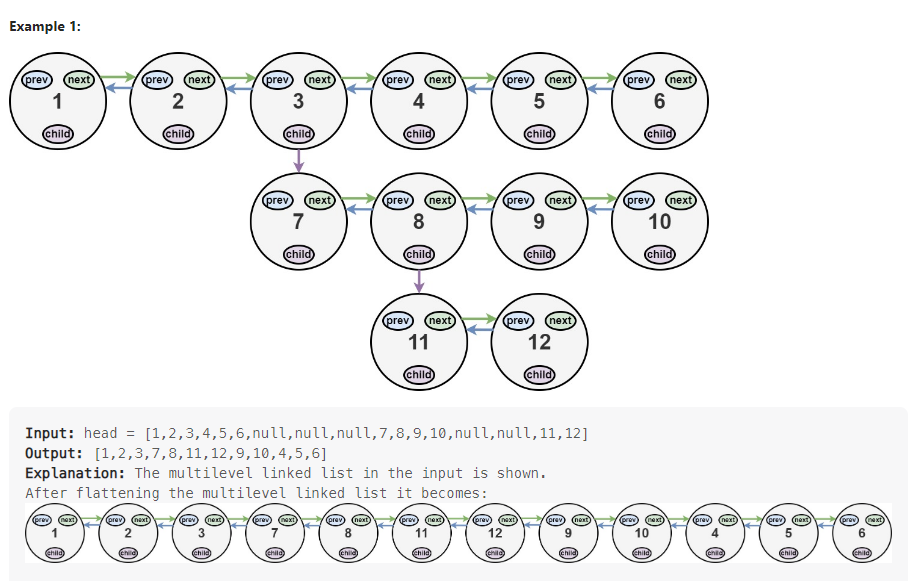
  
* Algorithm
  + general 
    + the problem is pretty straightforward. Each time, first build the next and/or prev connections, and then recursively call either head.next or head.child
    + each call will return the last leaf node
  + recursive version
    + if head is None, return None
    + in traverse(head)
      + if head.next is None and head.child is None, return head. head is a leaf node
      + if head.child is None, then recursively call traverse(head.next), no pointer setting is needed
      + otherwise
        + first keep head.next in next node, then link the head.next to head.child
        + recursively call traverse(head.child) which returns the last node in the child branch
        + if next node is None, return tail, which is the last node of this branch
        + link the tail to next node, and recursively call traverse(head.next), which returns the last node of the next node as the last node of this branch
        

In [8]:
from typing import Optional, List

# recursive implementation
# Definition for a Node.
class Node:
    def __init__(self, val, prev, next, child):
        self.val = val
        self.prev = prev
        self.next = next
        self.child = child

class Solution:
    def flatten(self, head: 'Optional[Node]') -> 'Optional[Node]':
        if head is None or (head.next is None and head.child is None):
            return head
        
        def flat(head: 'Optional[Node]') -> 'Optional[Node]':
            if head.next is None and head.child is None:
                return head
            
            # if head.child is None, the connection between head and head.next
            # have been built, so just recursively call head.next
            if head.child is None:
                return flat(head.next)
            
            # first keep the head.next and then set up the connections
            # between head and head.child. Then recursively call head.child, which
            # is head.next after the connections are built
            next_node = head.next
            
            head.next = head.child
            head.child.prev = head
            head.child = None
            
            tail = flat(head.next)
            
            # if next_node is None, return tail as the last node of this recursive call
            if next_node is None:
                return tail
            
            # otherwise, build the connectios and recursively call next_node
            tail.next = next_node
            next_node.prev = tail
            return flat(next_node)
        
        flat(head)
        return head
                
# stack implementation
class Solution:
    def flatten(self, head: 'Optional[Node]') -> 'Optional[Node]':
        if head is None or (head.next is None and head.child is None):
            return head
        
        stack = [head]
        
        # set a pre node as dummy node to continue the loop logic
        pre = Node()
        
        while stack:
            curr = stack.pop()
            
            # push next and child branches to the stack, push next first
            # to process child branch first
            if curr.next:
                stack.append(curr.next)
            
            if curr.child:
                stack.append(curr.child)        
                curr.child = None
            
            # connect whatever is popped to pre
            pre.next = curr
            curr.prev = pre
            pre = curr
        
        # clean up and cut the dummy node
        head.prev = None
        
        return head                         

#### Leetcode 708. Insert into a Sorted Circular Linked List
* Overview
  + Given a Circular Linked List node, which is sorted in non-descending order, write a function to insert a value insertVal into the list such that it remains a sorted circular list. The given node can be a reference to any single node in the list and may not necessarily be the smallest value in the circular list.
  +If there are multiple suitable places for insertion, you may choose any place to insert the new value. After the insertion, the circular list should remain sorted.
  +If the list is empty (i.e., the given node is null), you should create a new single circular list and return the reference to that single node. Otherwise, you should return the originally given node.
* Algorithm
  + the key point is to find the insertion point where we can inser the node after it. They are two cases:
    + we find a point where curr.value<=insertVal<=curr.next.value
    + we goes to the switch point where the max value node connects to the min value node, where curr.val > curr.next.val, and
      + curr.value < insertVal (inserVal is bigger than any node values) or insertVal < curr.next.val (insertVal smaller than any node values), we insert the node after curr
  + if head is None, then we connect node.next to itself so that we have a one element cyclic list
  + we initialize curr = head.next, and then use while curr!=head to run the circle

In [10]:
# Definition for a Node.
class Node:
    def __init__(self, val=None, next=None):
        self.val = val
        self.next = next

class Solution:
    def insert(self, head: 'Optional[Node]', insertVal: int) -> 'Node':
        node = Node(insertVal)
        
        # create a one node cyclic list is the list is empty
        if not head:
            node.next = node
            return node
        
        # move one step forward to perform circle operation
        curr = head.next
        
        # circle the list to check each node
        while curr != head:
            
            # if we can find the insertion position where inserVal is between two nodes' vals
            if curr.val <= insertVal <=curr.next.val:
                break
            
            # or we arrive at the switching point and inserVal is smallest or largest in the list
            elif curr.val > curr.next.val and (curr.val < insertVal or insertVal < curr.next.val):
                break
            
            # otherwise, go one step forward to check the next node
            curr = curr.next
            
        # insert node
        node.next = curr.next
        curr.next = node
        
        return head        

#### Leetcode 138. Copy List with Random Pointer
* A linked list of length n is given such that each node contains an additional random pointer, which could point to any node in the list, or null.
* Construct a deep copy of the list. The deep copy should consist of exactly n brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.
* For example, if there are two nodes X and Y in the original list, where X.random --> Y, then for the corresponding two nodes x and y in the copied list, x.random --> y.
* Return the head of the copied linked list.
* The linked list is represented in the input/output as a list of n nodes. Each node is represented as a pair of \[val, random_index\] where:
  + val: an integer representing Node.val
  + random_index: the index of the node (range from 0 to n-1) that the random pointer points to, or null if it does not point to any node.
* Your code will only be given the head of the original linked list.
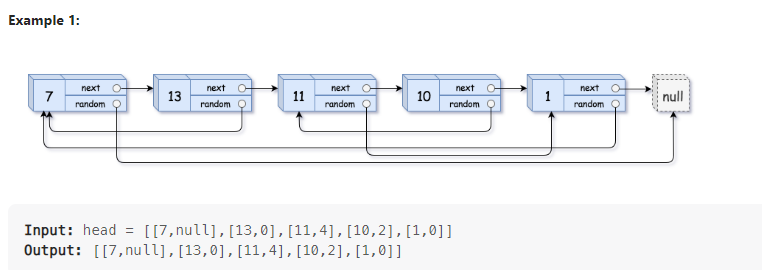

* Algorithm
  + set up a hashmap 
  + traverse the linked list, create a copy of the node, store the node as key and copy as value
  + traverse the list again, connect the next and random of copy node to the corresponding copies of the next and random (notice the case when next and random are None)
* time complexity
  + O(n)
* space complexity
  + O(n) for hashmap

In [12]:
from typing import Optional, List
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random

class Solution:
    def copyRandomList(self, head: 'Optional[Node]') -> 'Optional[Node]':
        if head is None:
            return None
        
        node_map = {}
        
        curr = head
        
        # store node as key and node copy as value in hashmap
        while curr:
            node = Node(curr.val)
            node_map[curr] = node
            curr = curr.next
            
        curr = head
        
        # traverse the list again to assign next and random
        # notice the cases when next and random are None
        while curr:            
            node_map[curr].next = node_map.get(curr.next, None)
            node_map[curr].random = node_map.get(curr.random, None)
            curr = curr.next
            
        return node_map[head]    
            
        

#### Leetcode 61. Rotate List
* Overview
  + Given the head of a linked list, rotate the list to the right by k places.
  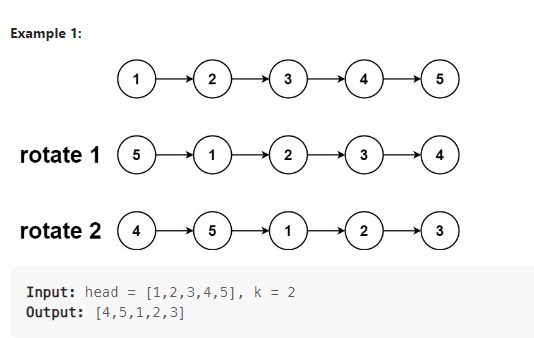
* Algorithm
  + if head is None, return None
  + get the length of the list
  + find how many positions from the end to move by k % length
  + set up curr to move k steps
  + set up pre=head, and then move with curr until curr.next is None (curr is at the tail node)
  + link tail to head by tail.next = head, then set head = pre.next and pre.next=None, return head
* time complexity
  + O(N) traverse the list twice
* space complexity
  + O(1)

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def rotateRight(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        if head is None:
            return None
        
        # get the length of the list
        n = 0
        curr = head
        while curr:
            n += 1
            curr = curr.next
            
        # get the exact value of k for rotation
        k %= n
        
        if k == 0:
            return head
        
        # move curr by k steps to find the rotation position
        curr = head
        while curr and k > 0:
            curr = curr.next
            k -= 1
        
        # set pre to head and move pre and curr
        # at the same pace, until curr point to the tail
        # pre points to the node before the new head and pre will be the new tail
        # pre.next is the rotation position, which will be the new head
        pre = head        
        while curr.next:
            curr = curr.next
            pre = pre.next
            
        # link the tail to the current head for rotation operation
        curr.next = head
        # set new head to pre.next, 
        # set pre.next to None (pre as the new tail)
        head = pre.next 
        pre.next = None
        
        return head        